## Analysis of yearly production of oil and gas
The global dataset of oil and natural gas production, prices, exports, and net exports. Oil production and prices data are for 1932-2014; gas production and prices are for 1955-2014; export and net export data are for 1986-2013. Country codes have been modified from earlier versions to conform to Correlates of War (COW) and Quality of Government (QOG) standards.

Oil production and prices data are for 1932-2014 (2014 data are incomplete); gas production and prices are for 1955-2014; export and net export data are for 1986-2013. Country codes have been modified from earlier versions to conform to Correlates of War (COW) and Quality of Government (QOG) standards

## First we need to get an understanding of our dataset and what it contains.

First we need to load our libraries and the data

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('datasets/oil_and_gas_yearly.csv')

We can print the column names by selecting the columns of our dataframe

In [4]:
df.columns

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

The "head" function prints the first 5 rows of our dataframe

In [5]:
df.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.87,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.67,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.00,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.97,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.09,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774


The dataset description in further up, mentions what ranges our data is defined. To simplify our task, we will select the range of our dataset where there is data available for gas and oil production.

In [6]:
df = df[(df['year'] >= 1955) & (df['year'] <= 2013)]
df.head()

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,...,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
23,Afghanistan,4,AFG,1955,Afghanistan,NaN,12.26506,1.93,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,8891209.0,1,6.426504,8.834988,1.374774
24,Afghanistan,4,AFG,1956,Afghanistan,NaN,12.07436,1.93,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9061938.0,1,6.333516,8.707150,1.374774
25,Afghanistan,4,AFG,1957,Afghanistan,NaN,11.47628,1.90,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9240934.0,1,6.111378,8.401761,1.374774
26,Afghanistan,4,AFG,1958,Afghanistan,NaN,12.24772,2.08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9428556.0,1,5.952954,8.183964,1.374774
27,Afghanistan,4,AFG,1959,Afghanistan,NaN,12.14371,2.08,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,9624606.0,1,5.901294,8.112943,1.374774


We can view the most current data, which would be 2013.

In [7]:
df_2013 = df[df['year'] == 2013]

We can select some random countries from the year 2013

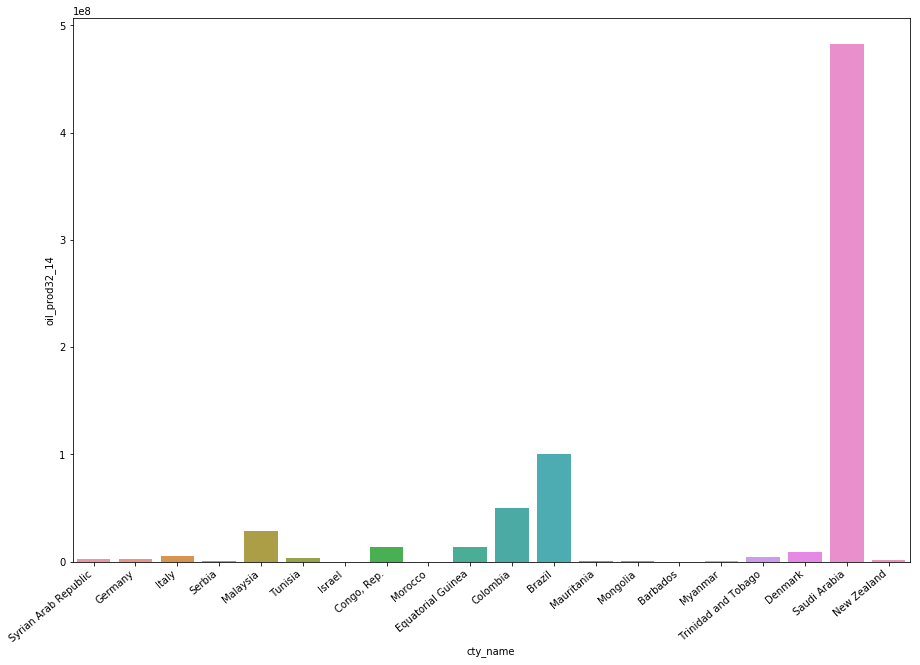

In [8]:
plt.figure(figsize=(15,10))
sample_df = df_2013[df_2013['oil_prod32_14'] > 0].sample(20)
ax = sns.barplot(x=sample_df['cty_name'], y=sample_df['oil_prod32_14'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

This can be sorted to give us the top oil producing countries in the word in 2013

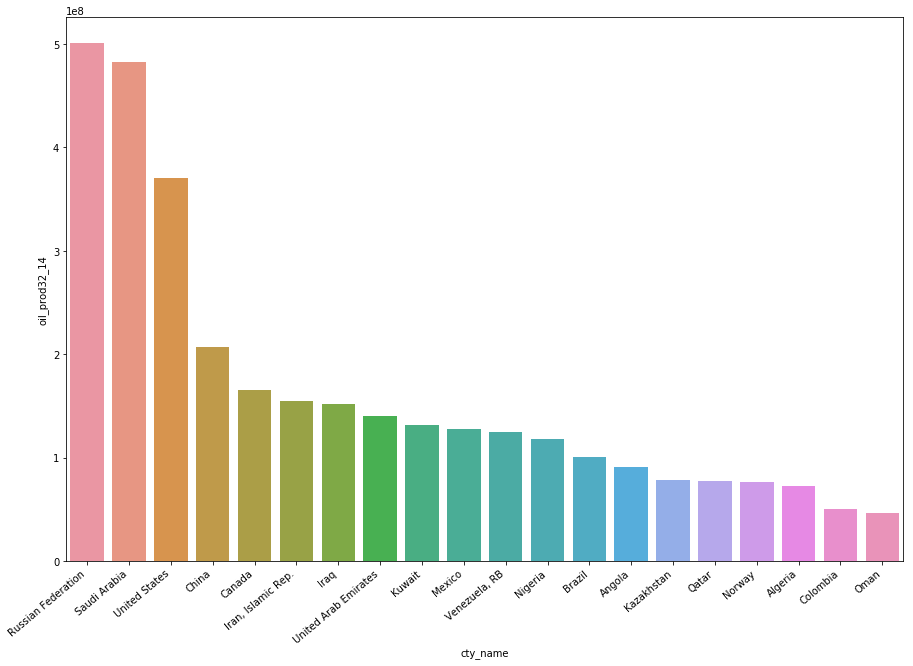

In [9]:
plt.figure(figsize=(15,10))
# Sort values and select the first 20
sample_df = df_2013.sort_values(by='oil_prod32_14', ascending=False).head(20)
ax = sns.barplot(x=sample_df['cty_name'], y=sample_df['oil_prod32_14'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

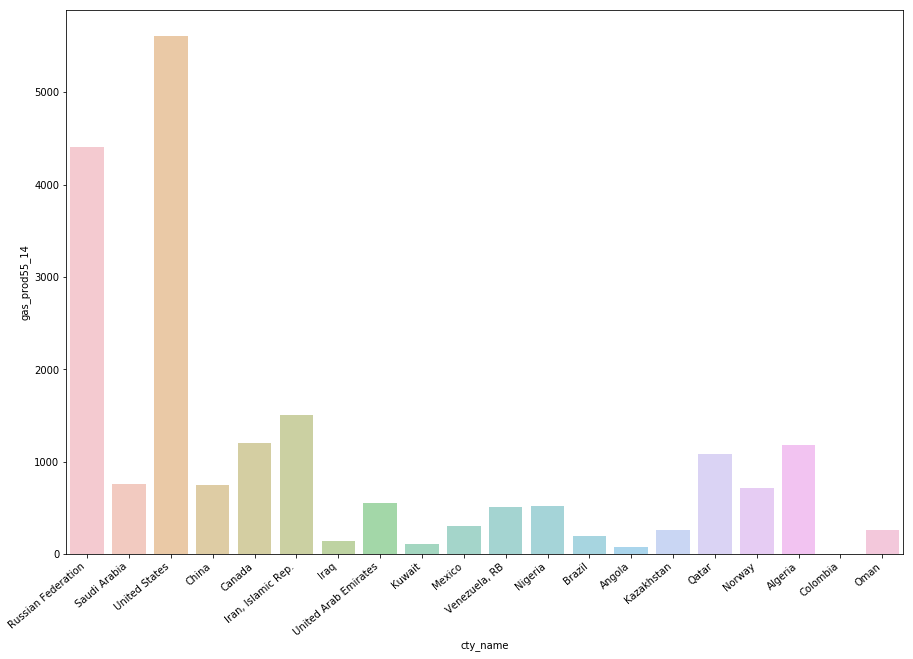

In [10]:
f, ax = plt.subplots(figsize=(15,10))
# If we sort by oil, but show the gas production, we can see how the same countries position themselves in regards to
#sns.barplot(x=sample_df['cty_name'], color='green', alpha=0.5, y=sample_df['oil_prod32_14'])
sns.barplot(x=sample_df['cty_name'], alpha=0.5, y=sample_df['gas_prod55_14'])
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.show()

The production can be plotted over time.

In [11]:
df_countries = df[df['cty_name'].isin(['Norway', 'Brazil', 'United Kingdom', 'Denmark'])]

C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


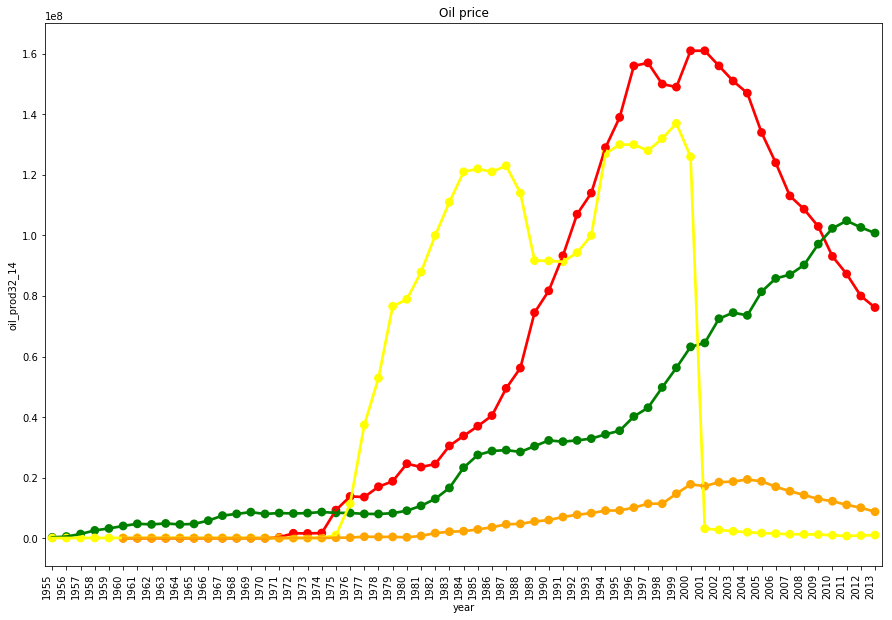

In [12]:
f, ax = plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='oil_prod32_14', data=df_countries[df['cty_name'] == 'Norway'], color='red')
sns.pointplot(x='year', y='oil_prod32_14', data=df_countries[df['cty_name'] == 'Brazil'], color='green')
sns.pointplot(x='year', y='oil_prod32_14', data=df_countries[df['cty_name'] == 'United Kingdom'], color='yellow')
sns.pointplot(x='year', y='oil_prod32_14', data=df_countries[df['cty_name'] == 'Denmark'], color='orange')
ax.set_title('Oil price')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
C:\appl\anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """


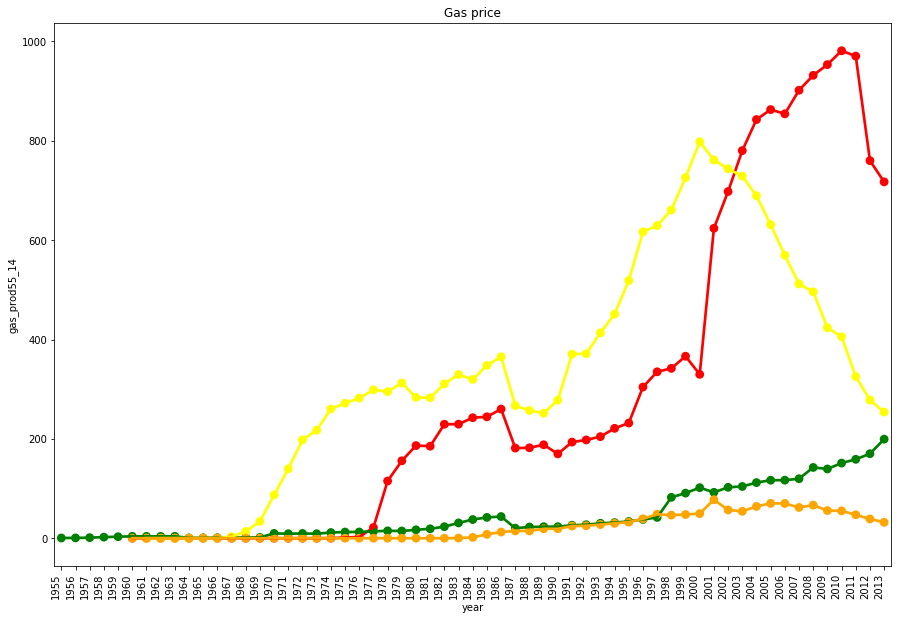

In [13]:
f, ax = plt.subplots(figsize=(15,10))
sns.pointplot(x='year', y='gas_prod55_14', data=df_countries[df['cty_name'] == 'Norway'], color='red')
sns.pointplot(x='year', y='gas_prod55_14', data=df_countries[df['cty_name'] == 'Brazil'], color='green')
sns.pointplot(x='year', y='gas_prod55_14', data=df_countries[df['cty_name'] == 'United Kingdom'], color='yellow')
sns.pointplot(x='year', y='gas_prod55_14', data=df_countries[df['cty_name'] == 'Denmark'], color='orange')
ax.set_title('Gas price')
_ = ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")

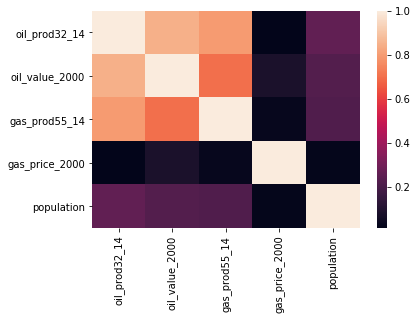

In [14]:
sns.heatmap(df[['oil_prod32_14', 'oil_value_2000', 'gas_prod55_14', 'gas_price_2000', 'population']].corr())

(0, 528735043.03624815)

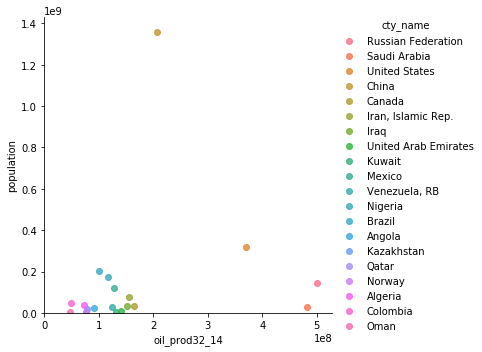

In [15]:
sns.lmplot(x='oil_prod32_14', y='population', data=sample_df,
           fit_reg=False, 
           hue='cty_name')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

(0, 528734094.5375711)

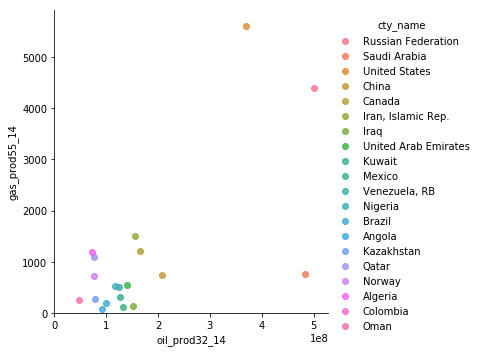

In [16]:
sns.lmplot(x='oil_prod32_14', y='gas_prod55_14', data=sample_df,
           fit_reg=False, 
           hue='cty_name')
 
# Tweak using Matplotlib
plt.ylim(0, None)
plt.xlim(0, None)

C:\appl\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


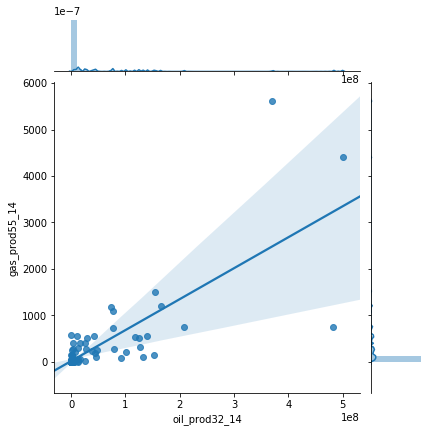

In [18]:
sns.jointplot("oil_prod32_14", "gas_prod55_14", data=df_2013, kind='reg');

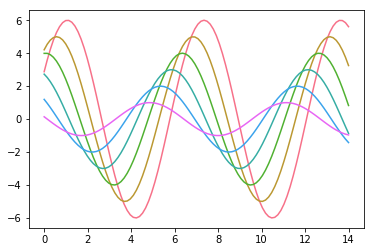

In [19]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100)
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)
sns.set_palette("husl")
sinplot()